In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('../../data/fanfic_regression_data_curated.tsv', sep = '\t')

In [3]:
len(df_all)

662728

In [4]:
df_all['Topic_novelty'].head()

0    0.633662
1    0.680856
2    0.681082
3    0.660941
4    0.648802
Name: Topic_novelty, dtype: float64

In [5]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [6]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Term_novelty', 'Topic_novelty', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adv

In [7]:
# df_all = df_all[['Chapters', 'Words','Freq_relationship', 'Category_F_F', 'Category_F_M',
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
#        'ArchiveWarnings_underage',
#        'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
#        'ArchiveWarnings_violence',
#        'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
#        'Rating_N', 'Rating_T',
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [8]:
# for i in range(len(df_all.columns.values)):
#     print(df_all.columns.values[i], variance_inflation_factor(df_all.values, i))

### Logistic

In [9]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Term_novelty', 'Topic_novelty', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adv

In [10]:
def run_logit(df, field):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Topic_novelty',\
        'Freq_relationship', 'Chapters', 'Category_F_F', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T', \
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [11]:
def run_ols(df, field):
    df = run_logit(df, field)
    df = df[df[field] != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty  + Topic_novelty \
 + Chapters + Freq_relationship + author_fic_cnt\
 + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_choose_no +\
 ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural  + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [12]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:-1])
kudos_err = list(kudos_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.081294
         Iterations: 35
         Function evaluations: 70
         Gradient evaluations: 66


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [13]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:-1]
hits_err = list(hits_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.092023
         Iterations: 35
         Function evaluations: 59
         Gradient evaluations: 55


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from

In [14]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:-1]
comments_err = list(comments_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from

In [15]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:-1]
bookmarks_err = list(bookmarks_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.424117
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from

In [115]:
# ~ Term_novelty + Term_novelty_squared + Topic_novelty + Topic_novelty_squared\
#  + Chapters + Freq_relationship + author_fic_cnt + Words\
#  + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
#  + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
#  ArchiveWarnings_choose_no +\
#  ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
#  + Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
#  Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
#  + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
#  + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
#  Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
#  Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob

In [17]:
ylabels =['Term novelty',  'Topic novelty', 'Chapters', \
 'Frequent relationship',' Author work count',\
 'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
 'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
 ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
 'Fandom (Harry Potter)', ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
 Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]

In [18]:
def plot_ax(ax, coef, err, xlim_left, xlim_right, rsquared=0, xlabel='', ylabel_flag=False, partial=False):
    
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o')
    ax.set_yticks(range(len(ylabels)))
    if ylabel_flag:
        ax.set_yticklabels(ylabels)
    else:
        ax.set_yticklabels([])

    ax.plot([0 for i in range(len(coef)+2)], range(-1,len(coef)+1), c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [40.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    if partial:
        ax.set_ylim(36.5,len(ylabels))
    else:
        ax.set_ylim(-0.5,len(ylabels))
    ax.set_xlim(xlim_left,xlim_right)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    ax.set_title('$R^2={}$'.format(rsquared), fontsize=15)

In [28]:
def plot_fig(partial=False):
    if partial:
        fig, ax = plt.subplots(1,4,figsize = (15,4))
    else:
        fig, ax = plt.subplots(1,4,figsize = (15,16))
    plot_ax(ax=ax[0], coef=kudos_coef, err=kudos_err, rsquared=0.258, xlim_left=-3, xlim_right=5, xlabel='Kudos', partial=partial, ylabel_flag=True)
    plot_ax(ax=ax[1], coef=hits_coef, err=hits_err,rsquared=0.210, xlabel='Hits', xlim_left=-2, xlim_right=3, partial=partial)
    plot_ax(ax=ax[2], coef=comments_coef, err=comments_err,rsquared=0.064, partial=partial, xlim_left=-3, xlim_right=8, xlabel='Comments')
    plot_ax(ax=ax[3], coef=bookmarks_coef, err=bookmarks_err, rsquared=0.264, partial=partial,  xlim_left=-3, xlim_right=5, xlabel='Bookmarks')
    plt.tight_layout()
    plt.savefig('ols_coefs_nosq_partial={}_no_merge.pdf'.format(partial), format='pdf')

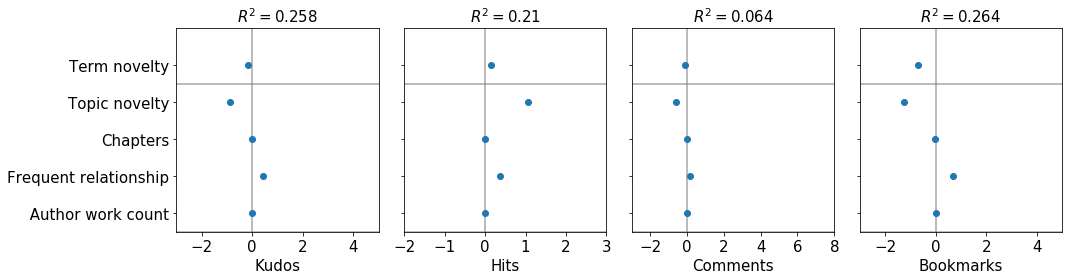

In [29]:
plot_fig(partial=True)

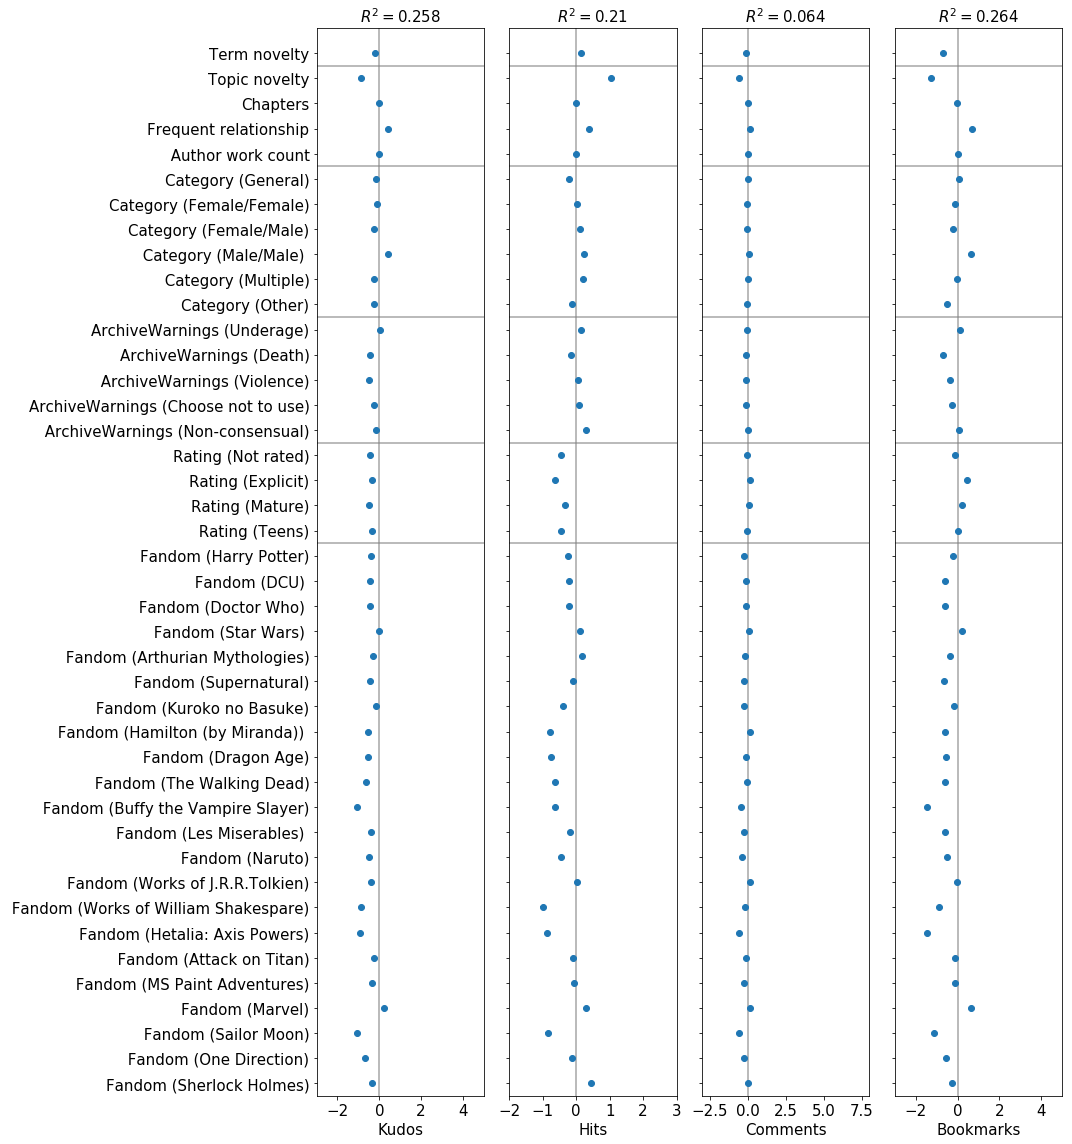

In [30]:
plot_fig()

In [21]:
# print(kudos_model.summary())

In [23]:
# print(hits_model.summary())

In [26]:
# print(comments_model.summary())

In [27]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     2679.
Date:                Wed, 29 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:09:04   Log-Likelihood:            -4.8531e+05
No. Observations:              313055   AIC:                         9.707e+05
Df Residuals:                  313012   BIC:                         9.712e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [27]:
# fig = plt.figure(figsize=(20,20))
# fig = sm.graphics.plot_regress_exog(kudos_model, "Term_novelty", fig=fig)
# plt.savefig('partial_reg_plots_term_novelty.png', format='png')